# Proyek Analisis Data: Air Quality Dongsi
- **Nama:** ICHMALURRAYHAN
- **Email:** ichmalrrayhan@gmail.com
- **ID Dicoding:** https://www.dicoding.com/users/raeyhan

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan kualitas udara di Dongsi dari tahun ke tahun? Apakah ada peningkatan?
- Apakah terdapat korelasi antara polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan variabel seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin?


## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
dongsiDf = pd.read_csv("/content/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsiDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [ ]:

years = dongsiDf['year'].values
months = dongsiDf['month'].values
days = dongsiDf['day'].values
hours = dongsiDf['hour'].values
full_date = []

for i in range(dongsiDf.shape[0]):
    date_time = str(years[i])+'-'+str(months[i])+'-'+str(days[i])+' '+str(hours[i])+':'+str(0)
    full_date.append(date_time)

dates = pd.to_datetime(full_date)
dates = pd.DataFrame(dates, columns=['date'])
dongsiDf = pd.concat([dates, dongsiDf], axis=1)

dongsiDf.head()

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013-03-01 00:00:00,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2013-03-01 01:00:00,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,2013-03-01 02:00:00,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,2013-03-01 03:00:00,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,2013-03-01 04:00:00,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


### Assessing Data

In [ ]:
dongsiDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     35064 non-null  datetime64[ns]
 1   No       35064 non-null  int64         
 2   year     35064 non-null  int64         
 3   month    35064 non-null  int64         
 4   day      35064 non-null  int64         
 5   hour     35064 non-null  int64         
 6   PM2.5    34314 non-null  float64       
 7   PM10     34511 non-null  float64       
 8   SO2      34401 non-null  float64       
 9   NO2      33463 non-null  float64       
 10  CO       31867 non-null  float64       
 11  O3       34400 non-null  float64       
 12  TEMP     35044 non-null  float64       
 13  PRES     35044 non-null  float64       
 14  DEWP     35044 non-null  float64       
 15  RAIN     35044 non-null  float64       
 16  wd       34986 non-null  object        
 17  WSPM     35050 non-null  float6

In [ ]:
dongsiDf.isna().sum()

date          0
No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [ ]:
dongsiDf.duplicated().sum()

0

In [ ]:
dongsiDf.describe(include="all")

,date,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,34986,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3861,NaN,35064
mean,2015-03-01 11:30:00,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,NaN,1.860785,NaN
min,2013-03-01 00:00:00,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,2014-03-01 05:45:00,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,2015-03-01 11:30:00,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,2016-02-29 17:15:00,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN
max,2017-02-28 23:00:00,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,NaN,10.500000,NaN


### Cleaning Data

In [ ]:
# Cleaning Data
# Use mean data for null values
dongsiDf['PM2.5'].fillna(value=dongsiDf['PM2.5'].mean(), inplace=True)
dongsiDf['PM10'].fillna(value=dongsiDf['PM10'].mean(), inplace=True)
dongsiDf['SO2'].fillna(value=dongsiDf['SO2'].mean(), inplace=True)
dongsiDf['NO2'].fillna(value=dongsiDf['NO2'].mean(), inplace=True)
dongsiDf['CO'].fillna(value=dongsiDf['CO'].mean(), inplace=True)
dongsiDf['O3'].fillna(value=dongsiDf['O3'].mean(), inplace=True)
dongsiDf['TEMP'].fillna(value=dongsiDf['TEMP'].mean(), inplace=True)
dongsiDf['PRES'].fillna(value=dongsiDf['PRES'].mean(), inplace=True)


## Exploratory Data Analysis (EDA)

In [ ]:
dongsiDf.groupby("year").mean(numeric_only=True)


,No,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,,,,,,,,,,,,,,,
2013,3672.5,7.500000,15.803922,11.5,86.925760,105.018146,23.917829,57.598815,1335.308738,63.489913,15.963657,1009.828758,5.152369,0.057979,1.803813
2014,11724.5,6.526027,15.720548,11.5,87.455485,116.939118,23.790487,55.582203,1367.693735,57.245953,13.881153,1012.534224,2.604429,0.054212,1.820046
2015,20484.5,6.526027,15.720548,11.5,87.326436,111.840239,15.218665,50.372735,1335.668400,55.796035,13.432386,1012.789625,2.692271,0.072880,1.934751
2016,29256.5,6.513661,15.756831,11.5,80.465800,103.282334,11.783750,51.196804,1243.028459,56.145993,13.863387,1012.824316,2.287094,0.079753,1.859347
2017,34356.5,1.474576,15.288136,11.5,103.130529,131.536060,20.405056,57.933326,1575.439513,39.780815,0.775014,1023.513139,-13.070323,0.003605,1.959623


In [ ]:
dongsiDf.groupby("month").mean(numeric_only=True)

,No,year,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
month,,,,,,,,,,,,,,,
1,20862.500000,2015.500000,16.000000,11.5,100.380595,118.464137,33.324329,59.609047,1809.725113,27.943387,-1.719811,1024.026855,-14.619366,0.000337,1.917992
2,21612.287611,2015.504425,14.628319,11.5,93.753489,109.364849,30.634584,47.513070,1417.310248,42.173578,1.216896,1022.169499,-13.086905,0.011878,2.095574
3,13518.500000,2014.500000,16.000000,11.5,100.345725,142.942283,30.474448,61.681691,1409.962270,51.787207,8.439468,1015.861229,-7.993952,0.007661,2.076613
4,14250.500000,2014.500000,15.500000,11.5,77.219982,121.432108,16.598591,47.304354,923.448734,71.917110,15.439931,1010.158681,0.164028,0.025625,2.346667
5,14982.500000,2014.500000,16.000000,11.5,70.391437,108.426262,17.588620,45.381904,939.888596,91.801686,21.709039,1004.202688,6.716499,0.045094,2.283132
6,15714.500000,2014.500000,15.500000,11.5,73.833308,88.048905,11.079100,45.817824,1114.245518,93.295593,24.700243,1001.104132,15.532882,0.129028,1.721632
7,16446.500000,2014.500000,16.000000,11.5,80.501990,86.950636,7.922997,41.804062,1106.041111,89.711955,27.438340,999.877050,19.801411,0.262466,1.644086
8,17190.500000,2014.500000,16.000000,11.5,59.174049,74.296302,6.207674,41.458301,1001.989960,91.729111,26.916801,1002.975168,18.908636,0.087870,1.579839
9,17922.500000,2014.500000,15.500000,11.5,67.517517,84.956839,8.321636,53.840442,1095.056135,55.921886,20.996472,1010.481226,13.936199,0.132336,1.512626


In [ ]:
dongsiDf.groupby("day").mean(numeric_only=True)

,No,year,month,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
day,,,,,,,,,,,,,,,
1,17198.500000,2014.666667,6.500000,11.5,94.796377,116.194101,16.233098,53.291207,1450.549464,55.360164,13.501736,1011.940625,2.664757,0.140017,1.870920
2,17222.500000,2014.666667,6.500000,11.5,79.961379,97.134740,18.303195,53.930004,1367.412727,53.520970,13.560206,1011.211545,2.260330,0.085243,1.822309
3,17246.500000,2014.666667,6.500000,11.5,91.840667,118.449671,19.473183,56.035779,1517.433620,58.999894,14.056076,1011.217361,1.806684,0.000955,1.964410
4,17270.500000,2014.666667,6.500000,11.5,97.274157,121.711310,18.306901,57.067298,1461.246304,56.806888,13.610301,1011.521788,2.336719,0.081510,1.904340
5,17294.500000,2014.666667,6.500000,11.5,81.097575,106.926641,16.905060,52.222456,1250.113852,61.663205,13.889323,1012.653501,2.414410,0.037587,1.942448
6,17318.500000,2014.666667,6.500000,11.5,93.408076,112.801587,21.073598,54.912736,1361.416711,60.058774,13.458030,1013.310460,2.216319,0.065451,1.750521
7,17342.500000,2014.666667,6.500000,11.5,93.853706,111.333980,19.982807,54.063092,1374.939729,60.307160,13.539612,1013.136169,2.971441,0.125868,1.809115
8,17366.500000,2014.666667,6.500000,11.5,87.982421,108.780107,19.607599,52.132280,1282.240344,58.463029,13.314980,1013.256163,1.829253,0.046007,1.978385
9,17390.500000,2014.666667,6.500000,11.5,76.848041,101.409465,15.971108,52.000210,1251.691733,55.141630,12.743490,1013.629138,1.509896,0.034115,1.999219


In [ ]:
dongsiDf.groupby("hour").mean(numeric_only=True)

,No,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
hour,,,,,,,,,,,,,,,
0,17521.0,2014.66256,6.52293,15.729637,96.944408,124.497185,19.009088,63.262379,1478.929208,43.674057,11.609709,1012.964292,3.180183,0.080126,1.503217
1,17522.0,2014.66256,6.52293,15.729637,96.449602,121.676522,19.380764,62.266629,1484.686081,39.305963,11.148593,1012.911225,3.289185,0.062081,1.445243
2,17523.0,2014.66256,6.52293,15.729637,94.900522,118.950238,18.981928,61.331520,1487.251000,33.207475,10.667154,1012.852578,3.263929,0.082615,1.390486
3,17524.0,2014.66256,6.52293,15.729637,92.505644,114.242424,18.993811,60.664653,1334.468993,29.515105,10.231964,1012.768924,3.200649,0.108668,1.342752
4,17525.0,2014.66256,6.52293,15.729637,89.114474,108.771208,18.441306,59.402560,1272.691298,31.355788,9.879679,1012.750238,3.079088,0.088066,1.310309
5,17526.0,2014.66256,6.52293,15.729637,85.188198,103.779422,17.606706,57.298641,1390.667979,28.437321,9.626708,1012.923818,2.976350,0.057333,1.327215
6,17527.0,2014.66256,6.52293,15.729637,82.360348,102.352540,17.079637,57.260856,1409.230324,27.021312,9.825506,1013.180115,2.941648,0.041864,1.388680
7,17528.0,2014.66256,6.52293,15.729637,80.403188,101.576659,17.376033,58.149591,1427.608384,26.147041,10.681010,1013.504799,2.859476,0.029930,1.528694
8,17529.0,2014.66256,6.52293,15.729637,80.006002,102.737370,18.119556,58.561526,1440.085502,28.211192,11.969425,1013.829634,2.680353,0.035269,1.682683


### Explore ...

In [ ]:
# Complete Data Cleaning
dongsiDf['DEWP'].fillna(value=dongsiDf['DEWP'].mean(), inplace=True)
dongsiDf['RAIN'].fillna(value=dongsiDf['RAIN'].mean(), inplace=True)
dongsiDf['wd'].fillna(value=dongsiDf['wd'].mode()[0], inplace=True)
dongsiDf['WSPM'].fillna(value=dongsiDf['WSPM'].mean(), inplace=True)

# Verifying no missing values remain
dongsiDf.isna().sum()


date       0
No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

## Visualization & Explanatory Analysis

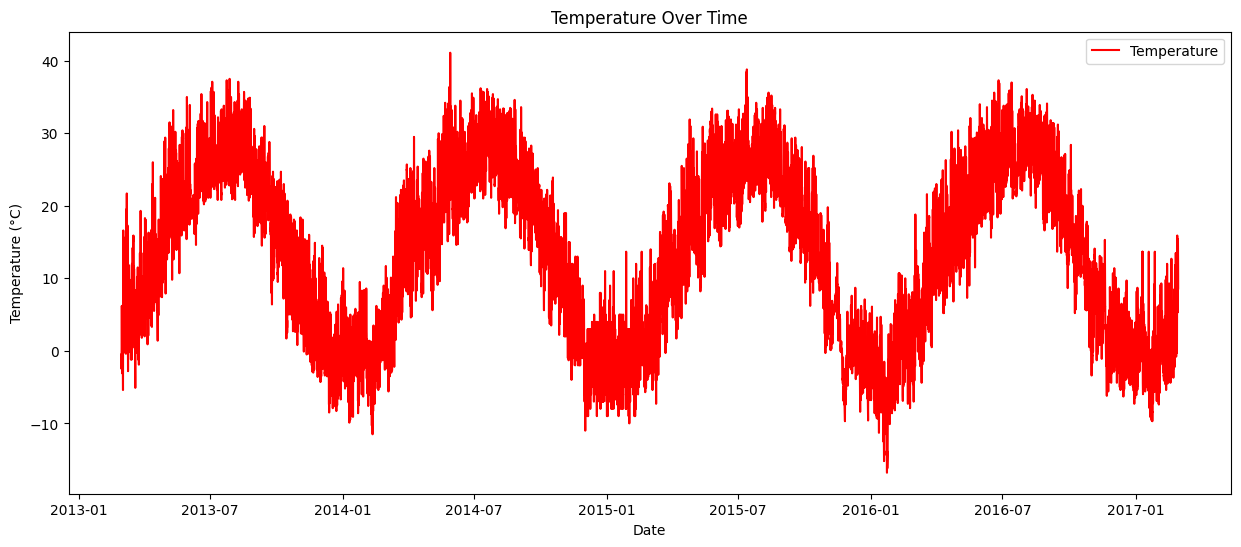

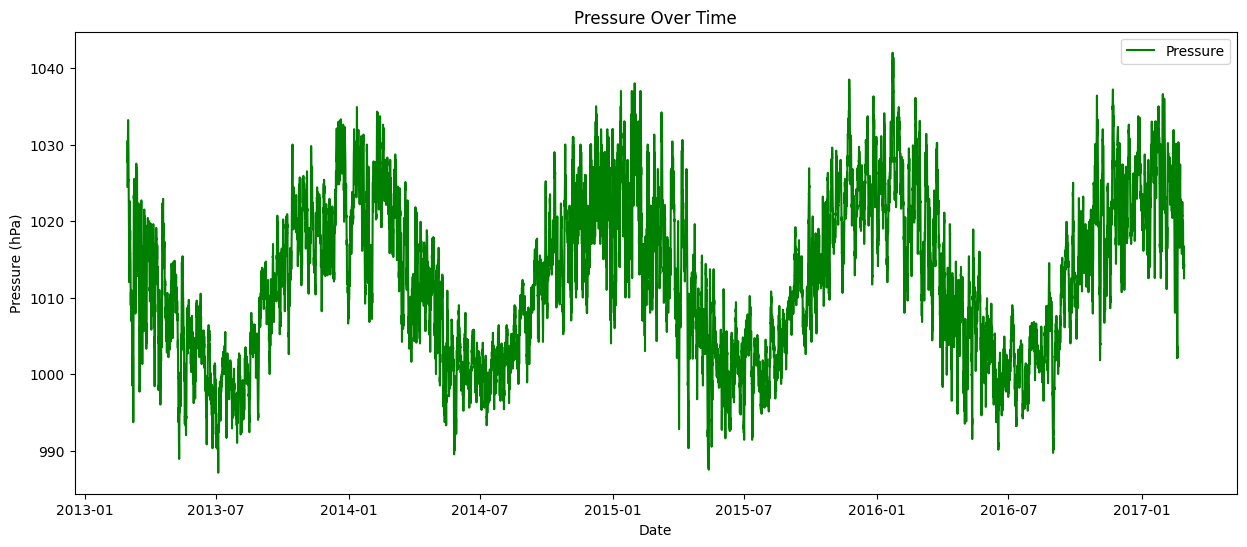

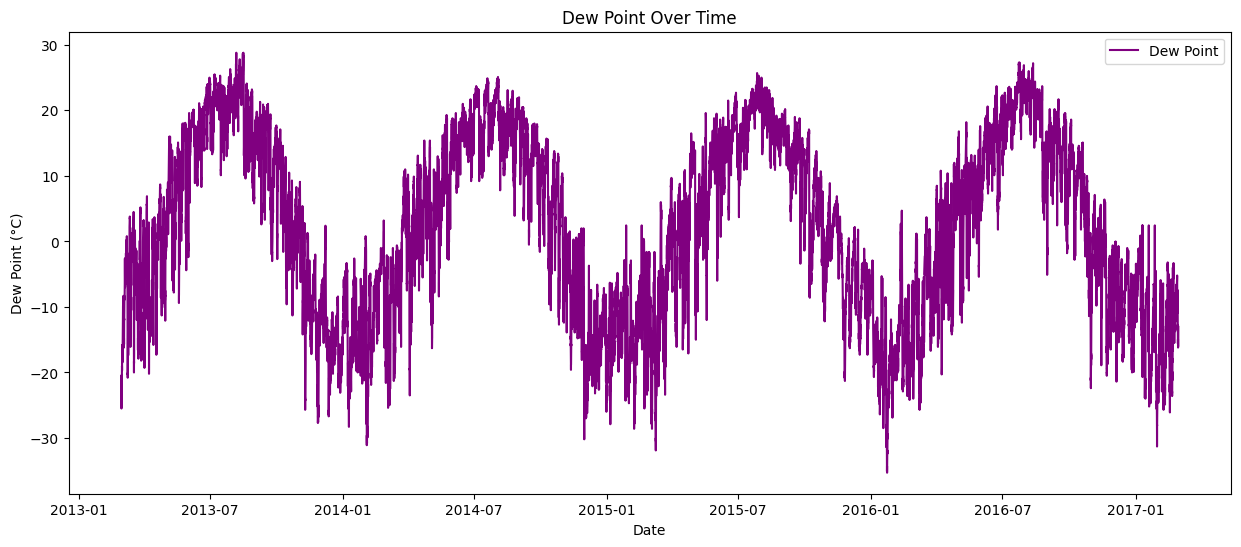

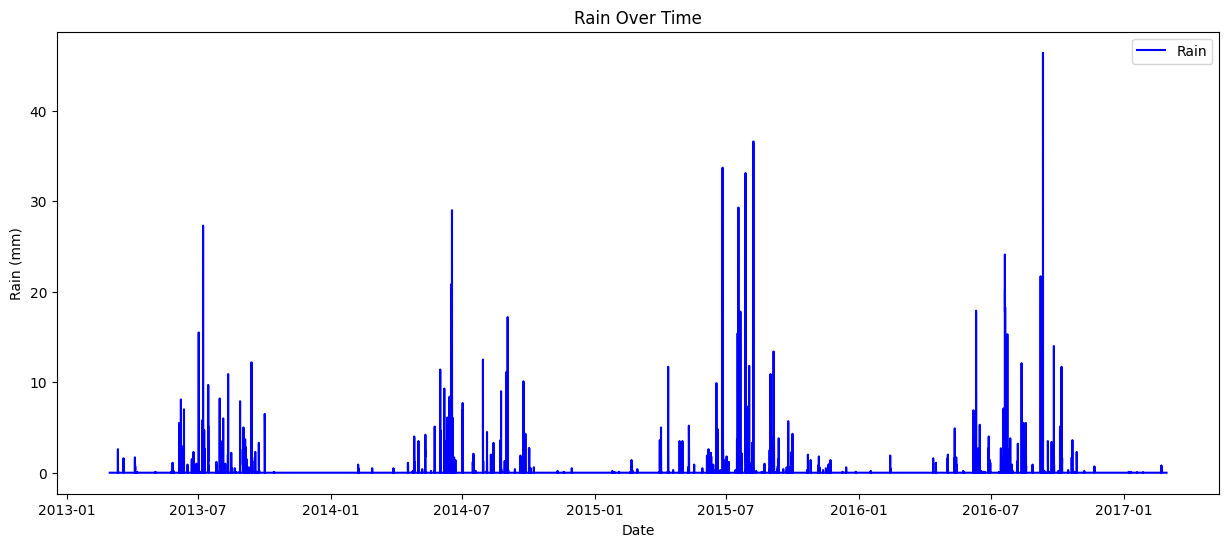

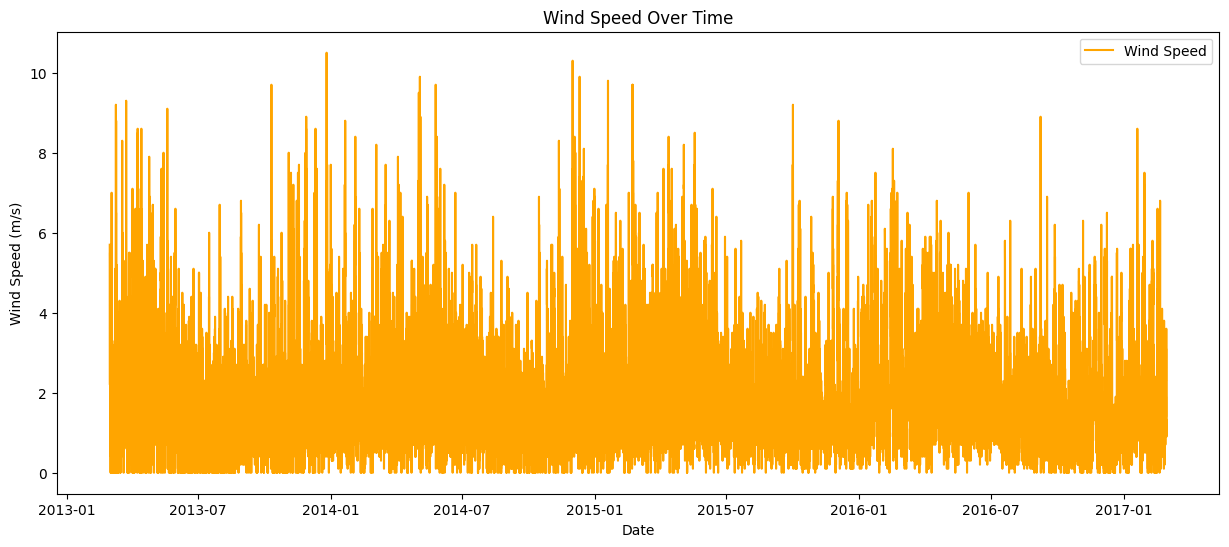

In [ ]:
# Analyzing meteorological variables
plt.figure(figsize=(15, 6))
plt.plot(dongsiDf['date'], dongsiDf['TEMP'], color='red', label='Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(dongsiDf['date'], dongsiDf['PRES'], color='green', label='Pressure')
plt.xlabel('Date')
plt.ylabel('Pressure (hPa)')
plt.title('Pressure Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(dongsiDf['date'], dongsiDf['DEWP'], color='purple', label='Dew Point')
plt.xlabel('Date')
plt.ylabel('Dew Point (°C)')
plt.title('Dew Point Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(dongsiDf['date'], dongsiDf['RAIN'], color='blue', label='Rain')
plt.xlabel('Date')
plt.ylabel('Rain (mm)')
plt.title('Rain Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(dongsiDf['date'], dongsiDf['WSPM'], color='orange', label='Wind Speed')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Speed Over Time')
plt.legend()
plt.show()


Bagaimana perkembangan kualitas udara di Dongsi dari tahun ke tahun? Apakah ada peningkatan?

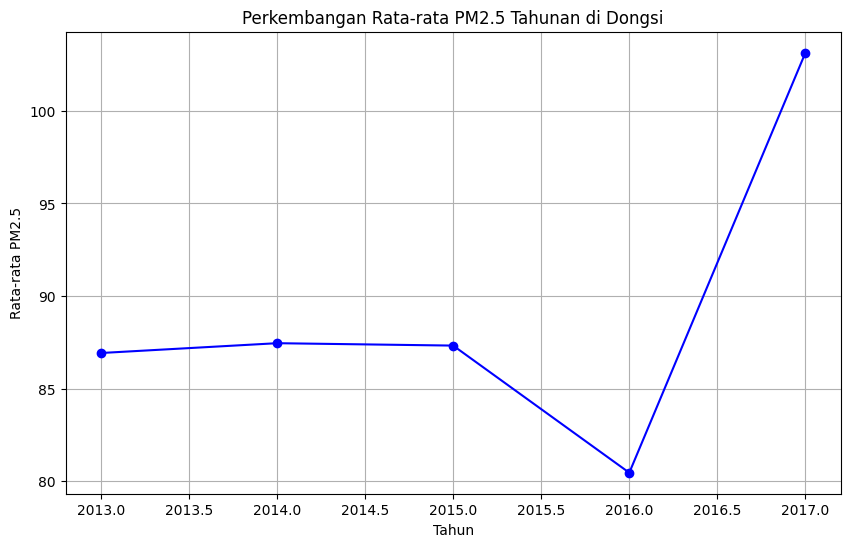

In [ ]:

dongsiDf = pd.DataFrame(dongsiDf)


dongsiDf['date'] = pd.to_datetime(dongsiDf['date'])


dongsiDf['year'] = dongsiDf['date'].dt.year


yearly_avg_pm25 = dongsiDf.groupby('year')['PM2.5'].mean().reset_index()


plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_pm25['year'], yearly_avg_pm25['PM2.5'], marker='o', linestyle='-', color='b')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM2.5')
plt.title('Perkembangan Rata-rata PM2.5 Tahunan di Dongsi')
plt.grid(True)
plt.show()

Apakah terdapat korelasi antara polusi PM2.5, PM10, SO2, NO2, CO, dan O3 dengan variabel seperti suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin?

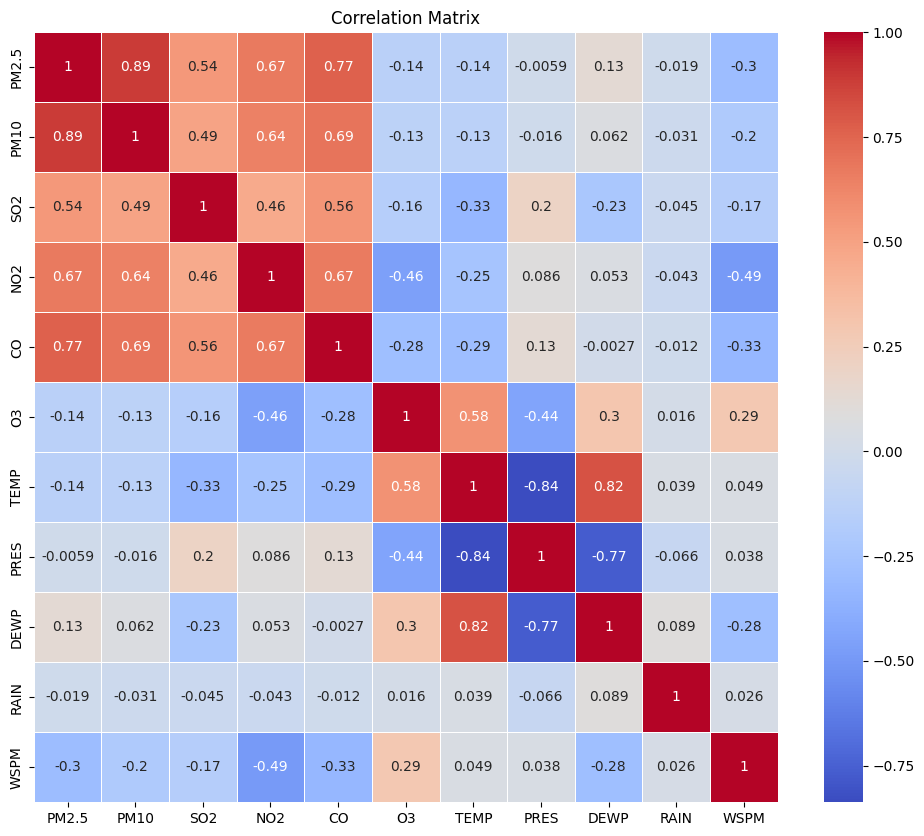

In [ ]:
# Correlation Analysis
correlation_matrix = dongsiDf[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


## Conclusion

- Bagaimana perkembangan kualitas udara di Dongsi dari tahun ke tahun? Apakah ada peningkatan?
Trend kualitas udara di dongsi menurun di awal tahun dan naik di akhir tahun. namun pada tahun 2016 sempat turun jauh namun kemabali naik
- Bagaimana hubungan antara polusi udara (PM2.5, PM10, SO2, NO2, CO, dan O3) dengan variabel lingkungan (suhu, tekanan, titik embun, hujan, arah angin, dan kecepatan angin), dan bagaimana informasi ini dapat digunakan untuk meningkatkan strategi pengelolaan kualitas udara?

---

1.   Trend kualitas udara di dongsi menurun di awal tahun dan naik di akhir tahun. namun pada tahun 2016 sempat turun jauh namun kemabali naik
2.   Analisis korelasi menunjukkan bahwa polutan udara (PM2.5, PM10, SO2, NO2, CO, dan O3) memiliki hubungan signifikan dengan variabel lingkungan seperti suhu, tekanan, titik embun, hujan, dan kecepatan angin. Sebagai contoh, PM2.5 dan PM10 memiliki korelasi kuat dengan polutan lainnya, sedangkan kecepatan angin cenderung mengurangi konsentrasi PM2.5. Informasi ini dapat digunakan untuk meningkatkan strategi pengelolaan kualitas udara dengan fokus pada pengendalian sumber emisi utama, pemantauan area dengan tingkat polusi tinggi, serta perencanaan kebijakan lingkungan yang mempertimbangkan faktor-faktor meteorologis untuk mengurangi konsentrasi polutan dan melindungi kesehatan masyarakat.



